There are several ways to customize your visualizations:

Besides modifying the parameters as shown [here](/ScanPyImports/Examples/PlotsImports/#parameters), you can:

1. **Work with Returned Values** after creating your visualizations.
2. Pass **Keyword Arguments (`kwargs`)** when calling methods such as **spiral_frequencies**, **cloud_frequencies**, and **plot**.
3. **Adjust Settings**.

## Working with Returned Values

The methods **spiral_frequencies**, **cloud_frequencies** and **plot** return the matplotlib figure and axes, which can be adjusted after the creation of the plot.

In addition, for spiral plots, the bars and text objects relating to the labels of the bars are returned. 

Let's add a title and change the color of the labels of the bars for a Spiral plot.

In [1]:
from ScanPyImports.plotter import DataPlotter
import matplotlib.pyplot as plt

Generate the spiral plot.

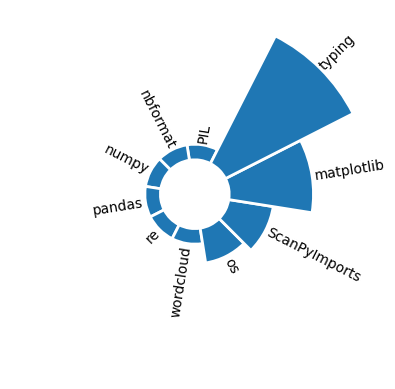

In [2]:
plotter = DataPlotter('../../ScanPyImports')

# Get the figure, axes, bars, and texts from the spiral frequencies plot
fig, ax, bars, texts = plotter.spiral_frequencies()

# If you prefer, you can use the Spiral class instead 
# fig, ax, bars, texts = spiral.plot(labels, values)

Work with the returned `ax`, `bars` and `texts`.

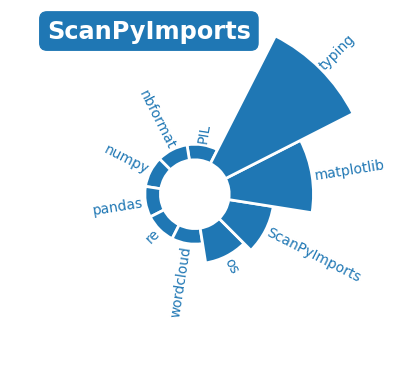

In [3]:
# Get the color of the bars
color = bars[0].get_facecolor()

# Add a title to the plot
title = ax.set_title('ScanPyImports',
                     color='white',
                     weight='bold',
                     loc='left',
                     y=0.9, x=0.1,
                     bbox=dict(boxstyle='round',
                               edgecolor=color,
                               facecolor=color),
                     fontsize='xx-large'
                     )

# Change the color of the bar labels
for text in texts:
    text.set_color(color)

# Return the figure
fig

## Keyword Arguments (`**kwargs`)

### Spiral - kwargs

For the spiral plot, you can pass additional keyword arguments to the **Matplotlib bar plot**. For more information on the allowed kwargs, see [Axes.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar).

Let's pass `facecolor='red'` to modify the color of the bars.

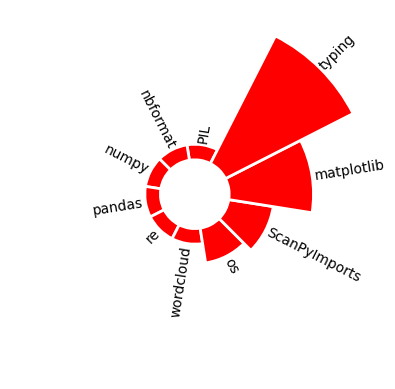

In [4]:
_ = plotter.spiral_frequencies(facecolor = 'red')

### Cloud - kwargs

For the cloud plot, you can pass additional keyword arguments required for the creation of the `WordCloud` object. For more information on the allowed kwargs, see [WordCloud](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud).

For instance, let's use a different colormap.

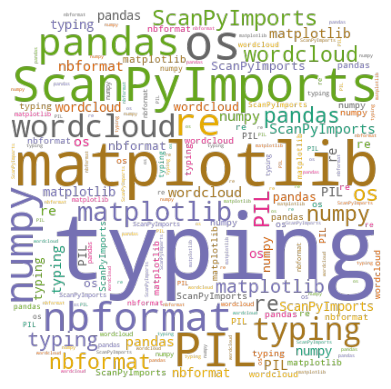

In [5]:
_ = plotter.cloud_frequencies(colormap = 'Dark2')

## Adjusting Settings

Settings control default values and parameters affecting the plots.

### Fonts

Changing the fonts through settings will affect the font of any new plot, even for plots using the Matplotlib API directly.

Let's change the font. If your computer has the font Impact, you can try the following:

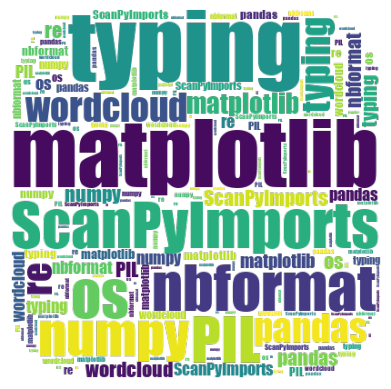

In [6]:
plotter.settings.set_font('impact')
_ = plotter.cloud_frequencies()

Otherwise, you can check which fonts are available on your computer.

In [7]:
from ScanPyImports.plotter import get_fontname_list
get_fontname_list()[:5]

['Agency FB', 'Algerian', 'Arial', 'Arial Rounded MT Bold', 'Bahnschrift']

Finally, you can always restore the original font using `restore_font()`.

In [8]:
plotter.settings.restore_font()

### Default Values

In settings, the default values to pass to the `**kwargs` arguments in the methods **spiral_frequencies**, **cloud_frequencies**, and **plot** are also stored.

#### **Spiral** Defaults

In [9]:
# Get the default settings for the spiral plot
defaults = plotter.settings.spiral_defaults 

for param, value in defaults.items():
    print(f'{param:<10}: {value}')


bottom    : 30
linewidth : 2
edgecolor : white


#### **Cloud** defaults

In [10]:
# Get the default settings for the cloud plot
defaults = plotter.settings.cloud_defaults

# Print each parameter 
for param, value in defaults.items():
    if param != 'mask':
        print(f'{param:<20}: {value}')
    else:
        # But mask it's a large numpy array
        print(f'{param:<20}: a numpy array (too long to show)')

background_color    : None
mode                : RGBA
mask                : a numpy array (too long to show)
font_path           : None
width               : 1000
height              : 1000
max_words           : 200
prefer_horizontal   : 0.75
repeat              : True
max_font_size       : 100
colormap            : None


### Modifying Default Settings

You can add or modify default values. Just ensure that the arguments are accepted by the bar plot method in matplotlib (for the Spiral defaults) or by the WordCloud object (for the Cloud defaults).

As an example, let's add the `facecolor` and change the `linewidth` of the bars.

In [11]:
# Modify the default settings 
plotter.settings.spiral_defaults = dict(facecolor='cyan', linewidth=5)

# Check the updated default settings
defaults = plotter.settings.spiral_defaults

for param, value in defaults.items():
    print(f'{param:<10}: {value}')

bottom    : 30
linewidth : 5
edgecolor : white
facecolor : cyan


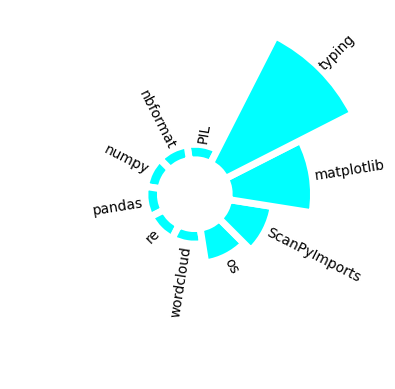

In [12]:
_ = plotter.spiral_frequencies()

Explicitly passing a `**kwargs` argument at call time takes precedence over the defaults!

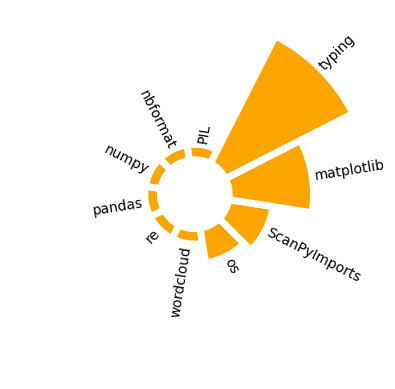

In [13]:
# Bars will be orange and not cyan as specified in the defaults!
_ = plotter.spiral_frequencies(facecolor='orange')